Training ANN Model...
Epoch 1/10 | Train Loss: 0.5505, Val Loss: 0.4180 | Train Acc: 79.87%, Val Acc: 84.83%
Epoch 2/10 | Train Loss: 0.4178, Val Loss: 0.3981 | Train Acc: 84.69%, Val Acc: 85.41%
Epoch 3/10 | Train Loss: 0.3776, Val Loss: 0.3723 | Train Acc: 86.17%, Val Acc: 86.47%
Epoch 4/10 | Train Loss: 0.3544, Val Loss: 0.3510 | Train Acc: 87.01%, Val Acc: 86.90%
Epoch 5/10 | Train Loss: 0.3395, Val Loss: 0.3411 | Train Acc: 87.48%, Val Acc: 87.34%
Epoch 6/10 | Train Loss: 0.3239, Val Loss: 0.3490 | Train Acc: 87.96%, Val Acc: 87.02%
Epoch 7/10 | Train Loss: 0.3107, Val Loss: 0.3398 | Train Acc: 88.46%, Val Acc: 87.66%
Epoch 8/10 | Train Loss: 0.3022, Val Loss: 0.3263 | Train Acc: 88.70%, Val Acc: 88.21%
Epoch 9/10 | Train Loss: 0.2912, Val Loss: 0.3390 | Train Acc: 89.07%, Val Acc: 87.92%
Epoch 10/10 | Train Loss: 0.2854, Val Loss: 0.3214 | Train Acc: 89.34%, Val Acc: 88.73%


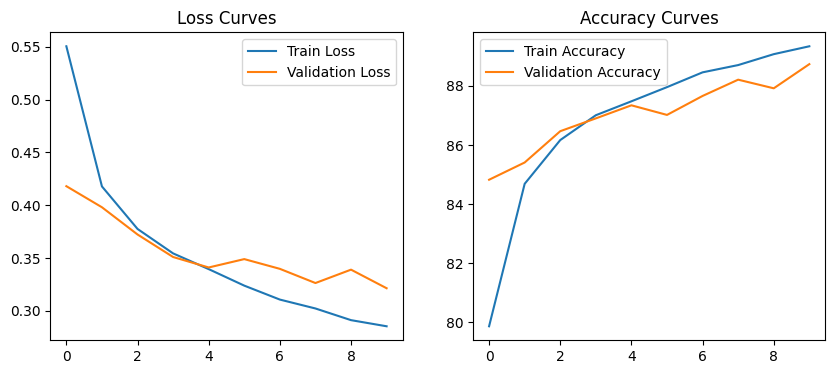

Evaluating ANN Model...

✅ Overall Test Accuracy: 87.90%


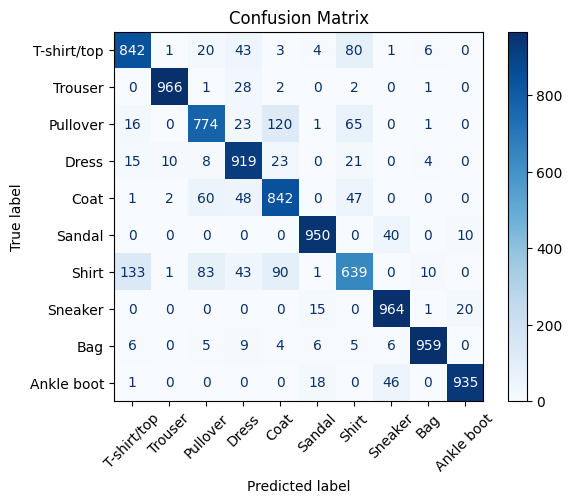


📊 Class-wise Accuracy:
T-shirt/top : 84.20%
Trouser     : 96.60%
Pullover    : 77.40%
Dress       : 91.90%
Coat        : 84.20%
Sandal      : 95.00%
Shirt       : 63.90%
Sneaker     : 96.40%
Bag         : 95.90%
Ankle boot  : 93.50%

⚠️ Most Confused Classes:
Shirt ↔ T-shirt/top (133 misclassifications)
✅ ANN Test Accuracy: 87.90%

Training CNN Model...
Epoch 1/10 | Train Loss: 0.4188, Val Loss: 0.3093 | Train Acc: 85.05%, Val Acc: 88.62%
Epoch 2/10 | Train Loss: 0.2637, Val Loss: 0.2413 | Train Acc: 90.44%, Val Acc: 91.28%
Epoch 3/10 | Train Loss: 0.2069, Val Loss: 0.2242 | Train Acc: 92.44%, Val Acc: 91.89%
Epoch 4/10 | Train Loss: 0.1691, Val Loss: 0.2351 | Train Acc: 93.69%, Val Acc: 91.72%
Epoch 5/10 | Train Loss: 0.1385, Val Loss: 0.2306 | Train Acc: 94.83%, Val Acc: 91.99%
Epoch 6/10 | Train Loss: 0.1116, Val Loss: 0.2324 | Train Acc: 95.79%, Val Acc: 92.37%
Epoch 7/10 | Train Loss: 0.0938, Val Loss: 0.2531 | Train Acc: 96.48%, Val Acc: 92.16%
Epoch 8/10 | Train Loss: 0.0758, V

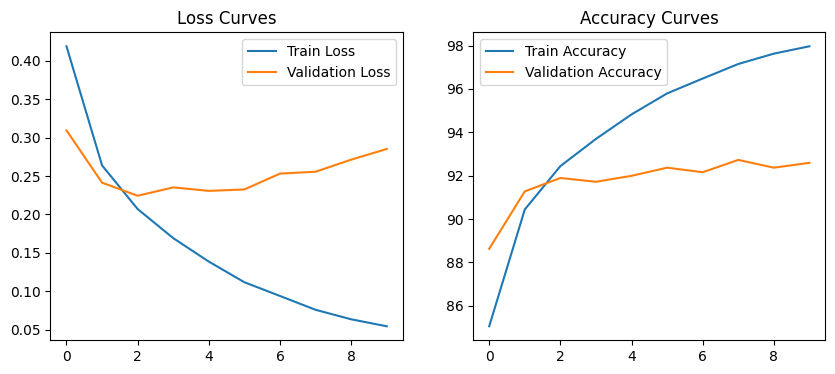

Evaluating CNN Model...

✅ Overall Test Accuracy: 92.09%


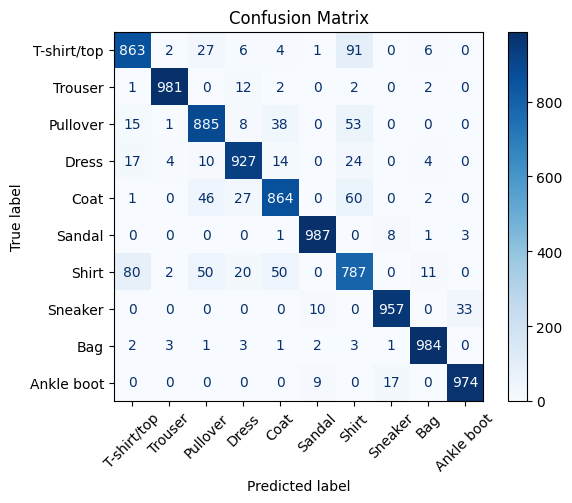


📊 Class-wise Accuracy:
T-shirt/top : 86.30%
Trouser     : 98.10%
Pullover    : 88.50%
Dress       : 92.70%
Coat        : 86.40%
Sandal      : 98.70%
Shirt       : 78.70%
Sneaker     : 95.70%
Bag         : 98.40%
Ankle boot  : 97.40%

⚠️ Most Confused Classes:
T-shirt/top ↔ Shirt (91 misclassifications)
Epoch [1/10] | Train Loss: 0.5091 | Val Loss: 0.3298
Epoch [2/10] | Train Loss: 0.3291 | Val Loss: 0.2830
Epoch [3/10] | Train Loss: 0.2821 | Val Loss: 0.2538
Epoch [4/10] | Train Loss: 0.2487 | Val Loss: 0.2299
Epoch [5/10] | Train Loss: 0.2235 | Val Loss: 0.2190
Epoch [6/10] | Train Loss: 0.1987 | Val Loss: 0.2224
Epoch [7/10] | Train Loss: 0.1763 | Val Loss: 0.2206
Epoch [8/10] | Train Loss: 0.1617 | Val Loss: 0.2215
Epoch [9/10] | Train Loss: 0.1438 | Val Loss: 0.2264
Epoch [10/10] | Train Loss: 0.1293 | Val Loss: 0.2279
✅ CNN Test Accuracy: 92.22%


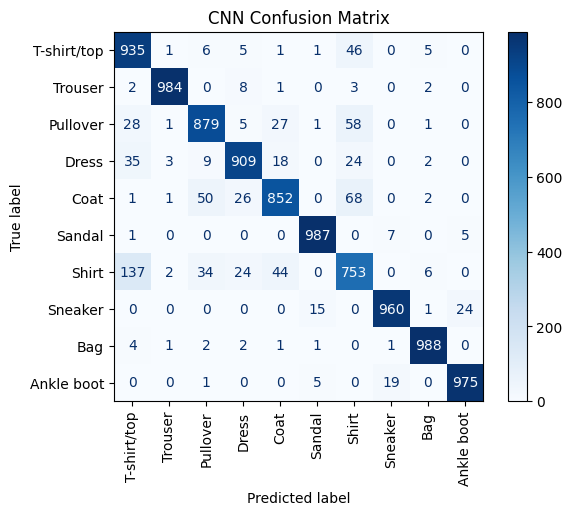

CNN Accuracy: 92.22%
ANN Accuracy: 87.90%

Top 3 Most Confused Class Pairs:


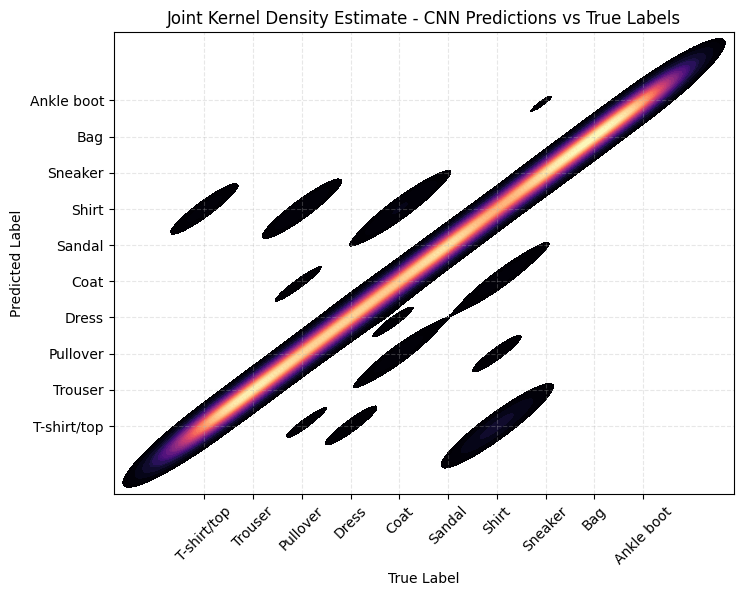

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np  # <-- Added for confusion analysis

# 1️⃣ Load and preprocess data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size

train_set, val_set = random_split(train_data, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)


# 2️⃣ ANN Model
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.dropout = nn.Dropout(0.25)   # 🔹 Added dropout layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)              # 🔹 Apply dropout
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3️⃣ CNN Model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# ✅ Updated Function: Train and Evaluate (with Accuracy Curves)
def train_model(model, train_loader, val_loader, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_loss, val_loss = [], []
    train_acc, val_acc = [], []

    for epoch in range(epochs):
        # ---------- Training ----------
        model.train()
        running_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss.append(running_loss / len(train_loader))
        train_acc.append(100 * correct / total)

        # ---------- Validation ----------
        model.eval()
        val_running_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                output = model(images)
                loss = criterion(output, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(output, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss.append(val_running_loss / len(val_loader))
        val_acc.append(100 * val_correct / val_total)

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f} | "
              f"Train Acc: {train_acc[-1]:.2f}%, Val Acc: {val_acc[-1]:.2f}%")

    # ---------- Plot Curves ----------
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss Curves')

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Curves')
    plt.show()

# ✅ Enhanced Function: Test + Class-wise Performance

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds, all_labels = [], []

    class_names = [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]

    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    acc = 100 * correct / total
    print(f"\n✅ Overall Test Accuracy: {acc:.2f}%")

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

    # ---------- Class-wise Accuracy ----------
    print("\n📊 Class-wise Accuracy:")
    for i, cls in enumerate(class_names):
        class_correct = cm[i, i]
        class_total = cm[i, :].sum()
        accuracy = 100 * class_correct / class_total if class_total > 0 else 0
        print(f"{cls:12s}: {accuracy:.2f}%")

    # ---------- Most Confused Classes ----------
    cm_no_diag = cm.copy()
    np.fill_diagonal(cm_no_diag, 0)
    max_confused = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)
    print("\n⚠️ Most Confused Classes:")
    print(f"{class_names[max_confused[0]]} ↔ {class_names[max_confused[1]]} "
          f"({cm_no_diag[max_confused]} misclassifications)")

    return acc, cm, all_labels, all_preds # Return accuracy, confusion matrix, all_labels and all_preds


# 4️⃣ Run and Compare Models
print("Training ANN Model...")
ann = ANN()
train_model(ann, train_loader, val_loader)
print("Evaluating ANN Model...")
ann_accuracy, _, _, _ = test_model(ann, test_loader)
print(f"✅ ANN Test Accuracy: {ann_accuracy:.2f}%")


print("\nTraining CNN Model...")
cnn = CNN()
train_model(cnn, train_loader, val_loader)
print("Evaluating CNN Model...")
cnn_accuracy, cm, all_labels, all_preds = test_model(cnn, test_loader) # Capture cm and all_labels, all_preds







# ================================================================
# 🔹 ADDITIONAL CODE TO COMPLETE COURSEWORK REQUIREMENTS
# ================================================================

# --- STEP 1: Create Validation Split ---
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data_full = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# 80% training, 20% validation split
train_size = int(0.8 * len(train_data_full))
val_size = len(train_data_full) - train_size
train_data, val_data = random_split(train_data_full, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# --- STEP 2: CNN Model Implementation ---
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

cnn_model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)




# --- STEP 3: Train the CNN Model ---
num_epochs = 10
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    cnn_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")





# --- STEP 4: Evaluate CNN Model ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cnn_model.eval()
correct, total = 0, 0
all_preds, all_labels = [], []

test_loader = DataLoader(datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform),
                         batch_size=64, shuffle=False)

with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

cnn_accuracy = 100 * correct / total
print(f"✅ CNN Test Accuracy: {cnn_accuracy:.2f}%")


# --- STEP 5: Plot CNN Confusion Matrix ---
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=datasets.FashionMNIST.classes)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()




# --- STEP 6: Compare ANN vs CNN ---

print(f"CNN Accuracy: {cnn_accuracy:.2f}%")
print(f"ANN Accuracy: {ann_accuracy:.2f}%")

# --- STEP 7: Identify Most Confused Classes ---
import numpy as np

confused_pairs = np.unravel_index(np.argsort(-cm, axis=None), cm.shape)
print("\nTop 3 Most Confused Class Pairs:")
for i in range(3):
    a, b = confused_pairs[0][i], confused_pairs[1][i]
    if a != b:

        print(f"{datasets.FashionMNIST.classes[a]} ↔ {datasets.FashionMNIST.classes[b]} ({cm[a,b]} samples)")




# ✅ Joint KDE Plot for Prediction vs True Labels (CNN)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create dataframe for KDE
df_kde = pd.DataFrame({
    "True": all_labels, # Corrected variable name
    "Predicted": all_preds # Corrected variable name
})

plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df_kde,
    x="True",
    y="Predicted",
    fill=True,
    cmap="magma",
    thresh=0.05,
    levels=50
)

plt.title("Joint Kernel Density Estimate - CNN Predictions vs True Labels")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.xticks(range(10), datasets.FashionMNIST.classes, rotation=45) # Corrected variable name
plt.yticks(range(10), datasets.FashionMNIST.classes) # Corrected variable name
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

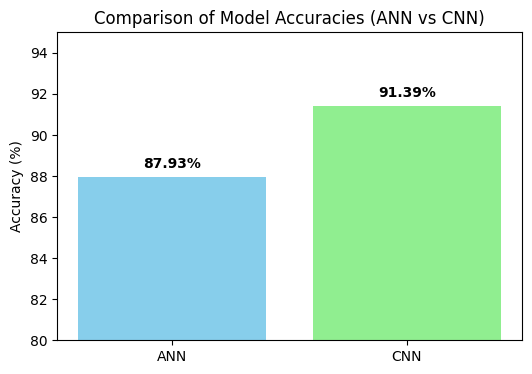

In [3]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['ANN', 'CNN']
accuracies = [87.93  , 91.39]

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(80, 95)
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies (ANN vs CNN)')

# Add values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.3, f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()